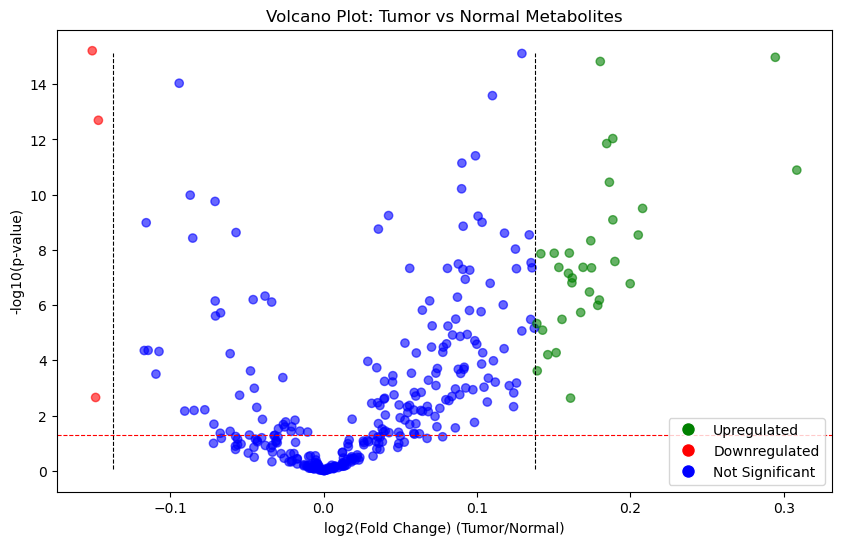

In [7]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

# Input data
normal_data = pd.read_csv('Processing/BRCA_Terunuma_GCH1_Metabolites_normal.csv', index_col=0).T
tumor_data = pd.read_csv('Processing/BRCA_Terunuma_GCH1_Metabolites_tumor.csv', index_col=0).T

# Name of intersection metabolite
common_metabolites = normal_data.index.intersection(tumor_data.index)

# Calculate the average value
normal_means = normal_data.loc[common_metabolites].mean(axis=1)
tumor_means = tumor_data.loc[common_metabolites].mean(axis=1)

# Calculate fold change and p-value
fold_changes = np.log2(tumor_means / normal_means)
p_values = [ttest_ind(tumor_data.loc[metabolite], normal_data.loc[metabolite], equal_var=False).pvalue for metabolite in common_metabolites]
log_p_values = -np.log10(p_values)

# Data for volcano plot
volcano_data = pd.DataFrame({
    'Metabolite': common_metabolites,
    'log2(Fold Change)': fold_changes,
    '-log10(p-value)': log_p_values
})

# color setting
colors = np.where((volcano_data['log2(Fold Change)'] > np.log2(1.1)) & (volcano_data['-log10(p-value)'] > -np.log10(0.05)), 'green',
                  np.where((volcano_data['log2(Fold Change)'] < -np.log2(1.1)) & (volcano_data['-log10(p-value)'] > -np.log10(0.05)), 'red', 'blue'))


plt.figure(figsize=(10, 6))
plt.scatter(volcano_data['log2(Fold Change)'], volcano_data['-log10(p-value)'], color=colors, alpha=0.6)


plt.axvline(np.log2(1.1), color='black', linestyle='--', linewidth=0.8, label='Fold Change = +1.1', ymin=0.05, ymax=0.95)
plt.axvline(-np.log2(1.1), color='black', linestyle='--', linewidth=0.8, label='Fold Change = -1.1', ymin=0.05, ymax=0.95)


plt.axhline(1.3, color='red', linestyle='--', linewidth=0.8, label='p = 0.05')


plt.xlabel('log2(Fold Change) (Tumor/Normal)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot: Tumor vs Normal Metabolites')
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Upregulated'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Downregulated'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Not Significant')
]
plt.legend(handles=legend_elements, loc='lower right')


plt.savefig("GCH1_vol.png", dpi=300)

# 顯示圖表
plt.show()


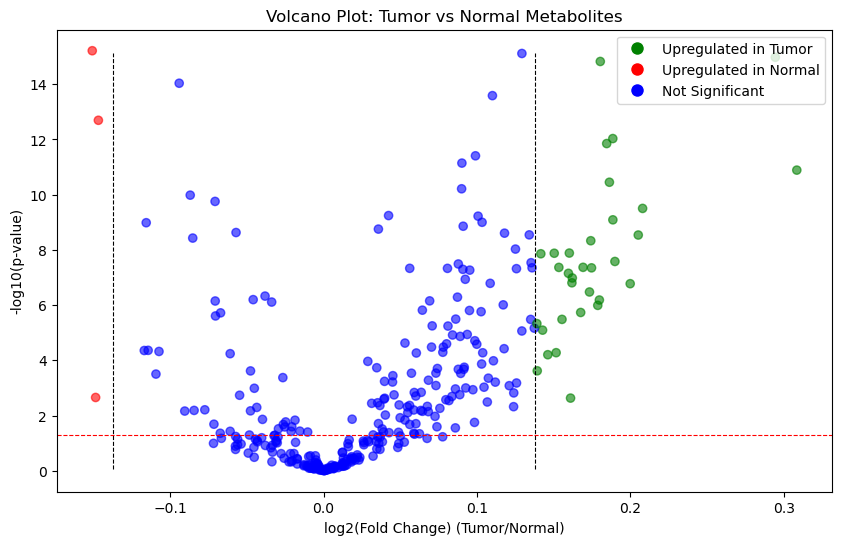

In [28]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

# Input data
normal_data = pd.read_csv('BRCA_Terunuma_log2_NAMPT_Metabolites_normal.csv', index_col=0).T
tumor_data = pd.read_csv('BRCA_Terunuma_log2_NAMPT_Metabolites_tumor.csv', index_col=0).T

# Name of intersection metabolite
common_metabolites = normal_data.index.intersection(tumor_data.index)

# Calculate the average value
normal_means = normal_data.loc[common_metabolites].mean(axis=1)
tumor_means = tumor_data.loc[common_metabolites].mean(axis=1)

# Calculate fold change and p-value
fold_changes = np.log2(tumor_means / normal_means)
p_values = [ttest_ind(tumor_data.loc[metabolite], normal_data.loc[metabolite], equal_var=False).pvalue for metabolite in common_metabolites]
log_p_values = -np.log10(p_values)

#  Data for volcano plot
volcano_data = pd.DataFrame({
    'Metabolite': common_metabolites,
    'log2(Fold Change)': fold_changes,
    '-log10(p-value)': log_p_values
})

# color setting
colors = np.where((volcano_data['log2(Fold Change)'] > np.log2(1.1)) & (volcano_data['-log10(p-value)'] > -np.log10(0.05)), 'green',
                  np.where((volcano_data['log2(Fold Change)'] < -np.log2(1.1)) & (volcano_data['-log10(p-value)'] > -np.log10(0.05)), 'red', 'blue'))


plt.figure(figsize=(10, 6))
plt.scatter(volcano_data['log2(Fold Change)'], volcano_data['-log10(p-value)'], color=colors, alpha=0.6)


plt.axvline(np.log2(1.1), color='black', linestyle='--', linewidth=0.8, label='Fold Change = +1.1', ymin=0.05, ymax=0.95)
plt.axvline(-np.log2(1.1), color='black', linestyle='--', linewidth=0.8, label='Fold Change = -1.1', ymin=0.05, ymax=0.95)


plt.axhline(1.3, color='red', linestyle='--', linewidth=0.8, label='p = 0.05')


plt.xlabel('log2(Fold Change) (Tumor/Normal)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot: Tumor vs Normal Metabolites')
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Upregulated in Tumor'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Upregulated in Normal'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Not Significant')
]
plt.legend(handles=legend_elements, loc='upper right')


plt.savefig("NAMPT_Vol.png", dpi=300)


plt.show()
